### Capstone ALY6140 72178
Instructor: Selcuk Baran
 Submitted: Yuqin Liu
 10/25/2020


### Data description: 

There are two datasets in total, one is the test_data, and another is the train_data from the Healthcare insurance company. There are demographic data(gender, age, region code type), Vehicles data(Vehicle Age, Damage), Policy (Premium, sourcing channel) etc. I try to find out the factors that influencing the customers' response about the vehincle insurance plan. I built the model containing four variables:
Dependent variable:Gender, Vehicle age and Vehicle damage;
Independent variable: Response.

Here's the link of the data source:https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction


### Data Extraction:
Infer how relevant each column of data is to response through correlations, so as to derive which variables are used as model reference data.


In [22]:
import pandas as pd

In [23]:
df_train = pd.read_csv('train.csv')

In [24]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [26]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [27]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [28]:
df_train.corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


# Data visualization

In [29]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


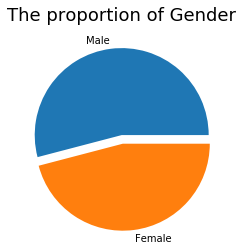

In [30]:
import matplotlib.pyplot as plt
import numpy as np

res = df_train['Gender'].value_counts()
index = res.index
value = res.values

explode = [0.,0.1]
plt.pie(value,labels=index,explode=explode)
plt.title('The proportion of Gender',fontsize=18)
plt.show()

The pie chart shows that boys are the majority in the original data.

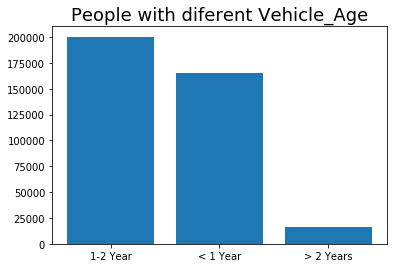

In [31]:
res1 = df_train['Vehicle_Age'].value_counts()
index = res1.index
value = res1.values

plt.bar(index,height=value)
plt.xticks(np.arange(len(index)),index)
plt.title('People with different Vehicle_Age',fontsize=18)
plt.show()

The histogram shows that most of the traffic vehicles owned by people are less than two years old. Those older than two years account for a very small number.

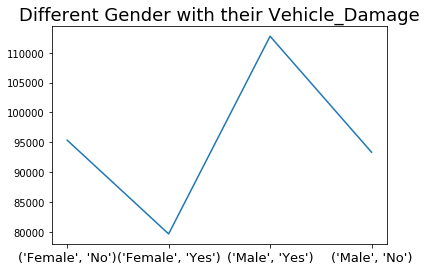

In [32]:
res3 = df_train.groupby(by='Gender')['Vehicle_Damage'].value_counts()
label = res3.index.tolist()
value = res3.values.tolist()
plt.plot(value)
plt.xticks(np.arange(len(label)),label,fontsize=13)
plt.title('Different Gender with their Vehicle_Damage',fontsize=18)
plt.show()

This is a three-dimensional graph, from which we can see that men who have experienced vehicle damage are the most, at the highest peak, and women who have experienced vehicle damage are at the lowest point.

# Modeling

I tried two models: Logicticregression  and KNeighborsClassifier, they both perform well and shared the same accuracy(87.71%).This means that at this accuracy rate, the three variables I selected have a strong influence on whether customers are interested in auto insurance.

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()
df_train['Gender'] = le.fit_transform(df_train['Gender'])

In [36]:
df_train['Vehicle_Age'] = le.fit_transform(df_train['Vehicle_Age'])

In [37]:
df_train['Vehicle_Damage'] = le.fit_transform(df_train['Vehicle_Damage'])

In [38]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [60]:
x = df_train[['Gender','Vehicle_Age','Vehicle_Damage']]
y = df_train['Response']

In [61]:
df_test = pd.read_csv('test.csv')

df_test['Gender'] = le.fit_transform(df_test['Gender'])
df_test['Vehicle_Age'] = le.fit_transform(df_test['Vehicle_Age'])
df_test['Vehicle_Damage'] = le.fit_transform(df_test['Vehicle_Damage'])

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [63]:
from sklearn.model_selection import train_test_split
train_x,train_y,test_x,test_y = train_test_split(x,y,random_state=0)

In [53]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train,y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
y_pred = logistic_regression.predict(x_test)

In [57]:
accuracy = metrics.accuracy_score(y_test,y_pred)
accuracy_percentage = accuracy*100
accuracy_percentage

87.71384789773084

In [65]:
testx = df_test[['Gender','Vehicle_Age','Vehicle_Damage']]

logistic_regression.predict(testx)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn = KNeighborsClassifier(n_neighbors=2,metric='minkowski',p=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [73]:
y_pred = knn.predict(x_test)

accuracy = metrics.accuracy_score(y_test,y_pred)
accuracy_percentage = accuracy*100
accuracy_percentage

87.71384789773084

In [74]:
knn.predict(testx)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)